# Pandas: Master Tabular Data

**Tabular data sets** are datasets that look like Excel sheets. They can be imported into Pandas data frames from various file formats. 

## Pandas data frames

**Pandas** provides a wide range of data wrangling tools. It is typically imported as:

In [1]:
import pandas as pd

In [2]:
# optional line to control formatting
pd.set_option('display.float_format', '{:.2f}'.format)

At the heart of any pandas analysis lies a pythonic equivalent of an excel sheet, called a **data frame**. It looks as follows:


<center>
    <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/pandas-data-structure.svg' width='75%'>
</center>

A dataframe is thus: a 2d array of data plus the column names and an index, which contains the row names. An important difference between `numpy` 2d arrays and `pandas` data frames is that a data frame does not have a data type, each column has its own data type. In pandas, we don't call them columns, but **series**.

We can import an data file  (excel, csv, ...) using the `pd.read_x()` command where 'x' is csv, excel. The cars data file that will be working with today is [available here](/www/resources/cars.csv). You can import it as follows:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ciri/iese-dsfb/main/resources/tabular/cars.csv')

There are a lot of extra arguments that we have not specified, you'll find the most commonly used ones at the bottom of this document. We can show it by just typing its name:

In [75]:
df

,introduction,group,brand,model_name,length,width,height,curb_weight,total_max_power_hp,price
0,2007,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 147,4223,1729.00,1442.00,1185,105,21950
1,2008,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 159,4661,1830.00,1422.00,1360,140,28450
2,2013,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 4C,3990,1868.00,1184.00,895,240,75360
3,2008,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 8C,4381,1894.00,1341.00,1560,450,220000
4,2009,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo Brera,4413,1830.00,1372.00,1420,200,40950
...,...,...,...,...,...,...,...,...,...,...
586,2007,Geely,Volvo,Volvo V70,4823,1861.00,1540.00,1467,145,39895
587,2020,Geely,Volvo,Volvo XC40,4425,1900.00,1652.00,2150,408,58775
588,2010,Geely,Volvo,Volvo XC60,4628,1891.00,1713.00,1610,203,49495
589,2004,Geely,Volvo,Volvo XC70,4733,1860.00,1562.00,1664,210,49815


We can extract its index, values and columns using the appropriately properties of the df:

In [76]:
df.index

RangeIndex(start=0, stop=591, step=1)

Without a explicit specification, the index is created automatically, as a `RangeIndex`. In this example, since the columns have different data types, `df.values` takes `object` type. The third component of the data frame is a list with the column names, which can be extracted as the attribute `columns`:

In [77]:
df.values

array([[2007, 'Fiat Chrysler Automobiles', 'Alfa Romeo', ..., 1185, 105,
        21950],
       [2008, 'Fiat Chrysler Automobiles', 'Alfa Romeo', ..., 1360, 140,
        28450],
       [2013, 'Fiat Chrysler Automobiles', 'Alfa Romeo', ..., 895, 240,
        75360],
       ...,
       [2010, 'Geely', 'Volvo', ..., 1610, 203, 49495],
       [2004, 'Geely', 'Volvo', ..., 1664, 210, 49815],
       [2003, 'Geely', 'Volvo', ..., 2023, 210, 56115]], dtype=object)

In [78]:
df.columns

Index(['introduction', 'group', 'brand', 'model_name', 'length', 'width',
       'height', 'curb_weight', 'total_max_power_hp', 'price'],
      dtype='object')

We can retreive the number of rows/columns using the familiar `shape` command:

In [79]:
df.shape

(591, 10)

We can also retreive the data types of each column using the `dtypes` property:

In [81]:
df.dtypes

introduction            int64
group                  object
brand                  object
model_name             object
length                  int64
width                 float64
height                float64
curb_weight             int64
total_max_power_hp      int64
price                   int64
dtype: object

Note that the data type of e.g., the fourth column, for which you would have expected `str`, is reported as `object`. Don't worry about this, you can apply string functions to this column, as will be seen later in this course. 

## Exploring Pandas objects

The methods `head` and `tail` extract the first and the last rows of a data frame, respectively. The default number of rows extracted is 5, but you can pass a custom number.

In [82]:
df.head(2)

,introduction,group,brand,model_name,length,width,height,curb_weight,total_max_power_hp,price
0,2007,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 147,4223,1729.00,1442.00,1185,105,21950
1,2008,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 159,4661,1830.00,1422.00,1360,140,28450


The content of a data frame can also be explored with the method `info`. It reports the dimensions, the data type and the number of non-missing values of every column of the data frame. 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   introduction        591 non-null    int64  
 1   group               591 non-null    object 
 2   brand               591 non-null    object 
 3   model_name          591 non-null    object 
 4   length              591 non-null    int64  
 5   width               590 non-null    float64
 6   height              590 non-null    float64
 7   curb_weight         591 non-null    int64  
 8   total_max_power_hp  591 non-null    int64  
 9   price               591 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 46.3+ KB


### Extracting a Series

A Series (column) can be extracted by typing its name in quotes:

In [84]:
df['introduction']

0      2007
1      2008
2      2013
3      2008
4      2009
       ... 
586    2007
587    2020
588    2010
589    2004
590    2003
Name: introduction, Length: 591, dtype: int64

In [85]:
# This is faster to type, but gives issues if you have special characters in
# the name of the dataframe's column.
df.introduction

0      2007
1      2008
2      2013
3      2008
4      2009
       ... 
586    2007
587    2020
588    2010
589    2004
590    2003
Name: introduction, Length: 591, dtype: int64

Note how the series is not just the values of that column, but also includes a reference to the name and the index. These can be extracted if you need them:

In [87]:
df.introduction.index
df.introduction.name
df.introduction.shape

(591,)

**You try it:**

Create a pandas Series of the volume of all the cars in m3.

Hint: start by extracting the height, width and length. Then, multiply the three numbers.

### Extracting a dataframe

You can also extract a data subdataframe containing a subset of complete columns from a data frame. You
can specify this with a list containing the names of those columns:

In [90]:
df[['introduction', 'price','model_name']]

,introduction,price,model_name
0,2007,21950,Alfa Romeo 147
1,2008,28450,Alfa Romeo 159
2,2013,75360,Alfa Romeo 4C
3,2008,220000,Alfa Romeo 8C
4,2009,40950,Alfa Romeo Brera
...,...,...,...
586,2007,39895,Volvo V70
587,2020,58775,Volvo XC40
588,2010,49495,Volvo XC60
589,2004,49815,Volvo XC70


The function `describe` returns a conventional statistical summary. The columns of type object are omitted,
except when all the columns have that type. Then the report contains only counts. This function also works
for series.

In [91]:
df.describe()

,introduction,length,width,height,curb_weight,total_max_power_hp,price
count,591.00,591.00,590.00,590.00,591.00,591.00,591.00
mean,2011.40,4438.12,1808.69,1547.02,1442.04,190.54,63054.16
std,5.79,471.16,106.20,203.17,379.72,146.91,91429.29
min,2001.00,2338.00,1396.00,1117.00,474.00,16.00,6995.00
25%,2006.00,4178.00,1750.00,1430.00,1164.00,100.00,21087.00
50%,2011.00,4495.00,1810.50,1513.50,1401.00,136.00,33207.00
75%,2017.00,4764.00,1881.50,1657.25,1694.50,231.00,60778.50
max,2020.00,6088.00,2070.00,2687.00,2635.00,1000.00,909770.00


Statistics can also be calculated manually using `min`, `max`, `mean`, `std`, `quantile`, etc.

In [92]:
df.price.median()

33207.0

<div class='warning-box'>
Warning: You can extract a subframe with a single column. Beware that this is not the same as a series.
`df['introduction']` is a series with shape `(5,)`, and `df[['introduction']]` is a data frame with shape (5,1)! This is a common source of confusion for people starting out in pandas.
</div>

### Adding data

During the process of handling a dataset, you may want to add new (calculated) columns to the dataframe. You can add them using the column indexing syntax:

In [93]:
df['price_squared'] = df['price'] * df['price']

In [94]:
df['price_squared']

0        481802500
1        809402500
2       5679129600
3      48400000000
4       1676902500
          ...     
586     1591611025
587     3454500625
588     2449755025
589     2481534225
590     3148893225
Name: price_squared, Length: 591, dtype: int64

### Row filtering expressions

In data science, rows are typically filtered by *expressions* (also called filters, or Boolean masks). An expression is a set of conditions that we wish to impose. They are encoded as a Boolean array.

Let's say that we want to get all cars introduced from the year 2010 onwards. We know that the `introduction` columns contains the year so we could write an expression for it as follows:

In [95]:
introduction_post_2010 = df['introduction'] >= 2010

This variable is Boolean numpy array that is `True` if the condition holds and `False` otherwise.

In [96]:
introduction_post_2010

0      False
1      False
2       True
3      False
4      False
       ...  
586    False
587     True
588     True
589    False
590    False
Name: introduction, Length: 591, dtype: bool

Such an expression can readily be pluggeds into the indexing of a dataframe to produce another (smaller) one where the condition applies:

In [97]:
df.shape

(591, 11)

In [98]:
df[introduction_post_2010].shape

(369, 11)

For small expression, this is usually written as a one-liner:

In [99]:
df[df['introduction'] >= 2010].head(10)

,introduction,group,brand,model_name,length,width,height,curb_weight,total_max_power_hp,price,price_squared
2,2013,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo 4C,3990,1868.00,1184.00,895,240,75360,5679129600
7,2020,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo Giulia,4643,1860.00,1436.00,1404,200,44170,1950988900
8,2014,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo Giulietta,4351,1798.00,1465.00,1255,105,23450,549902500
9,2011,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo MiTo,4065,1721.00,1434.00,1055,70,16450,270602500
10,2016,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo Mito,4063,1720.00,1453.00,1055,78,17950,322202500
11,2020,Fiat Chrysler Automobiles,Alfa Romeo,Alfa Romeo Stelvio,4687,1903.00,1671.00,1635,200,63335,4011322225
12,2011,Independent,Aston Martin,Aston Martin Cygnet,3078,1680.00,1500.00,988,98,41063,1686169969
13,2018,Independent,Aston Martin,Aston Martin DB11,4739,1940.00,1279.00,1870,510,262908,69120616464
14,2012,Independent,Aston Martin,Aston Martin DB9,4720,1875.00,1282.00,1785,517,258501,66822767001
16,2010,Independent,Aston Martin,Aston Martin Rapide,5019,1875.00,1360.00,1965,476,270234,73026414756


Of course, we can make more complicated expressions. If you want all car models form BMW after the year 2010:

In [100]:
is_bmw     = df['brand'] == 'BMW'
after_2010 = df['introduction'] >= 2010

# the & symbol means "and", it is going to check the condition
# row-by-row for both parts of the expression and return True
# if both conditions are True
bmw_after_2010 = is_bmw & after_2010 

df[bmw_after_2010].head(10)

,introduction,group,brand,model_name,length,width,height,curb_weight,total_max_power_hp,price,price_squared
47,2012,BMW,BMW,BMW 114i,4324,1765.00,1421.00,1265,102,25990,675480100
48,2020,BMW,BMW,BMW 116i,4319,1799.00,1434.00,1295,109,29989,899340121
49,2011,BMW,BMW,BMW 118i,4360,1748.00,1411.00,1395,143,36990,1368260100
50,2011,BMW,BMW,BMW 120i,4360,1748.00,1423.00,1275,170,36990,1368260100
51,2018,BMW,BMW,BMW 216i,4354,1800.00,1555.00,1325,109,32940,1085043600
52,2017,BMW,BMW,BMW 218i,4432,1774.00,1413.00,1475,136,47070,2215584900
53,2012,BMW,BMW,BMW 316i,4624,1811.00,1429.00,1360,136,33700,1135690000
56,2020,BMW,BMW,BMW 318i,4709,1827.00,1435.00,1445,156,41226,1699583076
57,2010,BMW,BMW,BMW 320i,4612,1782.00,1384.00,1570,170,51000,2601000000
58,2017,BMW,BMW,BMW 418i,4640,1825.00,1377.00,1405,136,41093,1688634649


Once expressions and indexing mechanisms become more complicated, I advise you to apply them step-by-step in order to not cause confusion. Here's another example where we apply both a row and column filter:

In [101]:
myfilter                     = df['introduction'] > 2000
filtered_data                = df[myfilter]
filtered_data_just_3_columns = filtered_data[['introduction', 'model_name', 'price']]

A lot of questions in data science can be answered using complex combinations of these filters - something that gets pretty cumbersome pretty quickly in Excel ...

**You try it**

Extract mass-consumer cars built after 2010. What's their average price?

We define a mass-consumer car as one for which the price is less than 25K dollars. 

Hint: work in steps:

1. first filter the data
2. then extract the price
3. then apply the `mean()` function


### Subsetting by index and label

Besides this, there are two additional ways to carry out a selection:

* **Selection by label** is specified by adding `.loc` after the name of the data frame. The selection of the rows is based on the index, and that of the columns is based on the column names.
* **Selection by position** uses `.iloc`. The selection of the rows is based on the row number and that of the columns on the column number.

In both cases, if you enter a single specification inside the brackets, it refers to the rows. If you enter two
specifications, the first one refers to the rows and the second one to the columns.

In [4]:
# df.loc[row_labels, column_labels]

In [ ]:
df.loc[[1,2,3,4,5],['model_name','price']]

In [ ]:
df.iloc[1:5,2:6]

### Pivot Tables

We will not cover all the possible functions of pandas here now, but as a rule of thumb if you can do it in Excel, there's a (usually faster) way to do it in Pandas. A more complex - but frequently used - Excel operation is the pivot function:

<center>
    <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/pandas_pivot.png' width='90%'>
</center>

In pandas, this can be done in one line of code by calling the `.pivot_table()` on your dataframe. By default, it will calculate the average, but you can specify other functions using the `aggfunc` argument.

In [107]:
df.pivot_table(index='group',columns='introduction',values='price')

introduction,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
group,,,,,,,,,,,,,,,,,,,,
BMW,NaN,NaN,38250.00,NaN,53700.00,57000.00,89365.00,NaN,NaN,51000.00,36990.00,27995.00,62478.50,29495.00,112168.00,NaN,47070.00,43347.00,78968.50,41226.00
Daimler AG,17555.00,28090.00,24350.00,NaN,10490.00,NaN,70901.00,78550.00,31950.00,145445.00,48450.00,NaN,48395.00,61470.00,75108.00,45538.00,NaN,39086.00,50795.00,53990.00
Fiat Chrysler Automobiles,15175.00,52395.00,124507.00,32500.00,27075.00,17950.00,27472.50,27622.50,27725.00,25990.00,49470.00,41395.00,48677.50,23450.00,NaN,35165.00,136008.00,NaN,25355.00,31315.00
Ford Motor Company,NaN,NaN,17645.00,NaN,15695.00,NaN,NaN,NaN,NaN,NaN,NaN,19555.00,NaN,19490.00,30425.00,NaN,NaN,21635.00,74995.00,49877.50
Geely,46222.00,22635.00,56115.00,49815.00,NaN,45800.00,26995.00,NaN,59922.00,49495.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49824.00
General Motors,39498.00,NaN,NaN,115450.00,16595.00,27230.00,29464.00,11295.00,NaN,49755.00,39245.00,NaN,26795.00,18995.00,66970.00,NaN,103195.00,NaN,NaN,NaN
Groupe PSA,28995.00,18100.00,20897.50,18990.00,23845.00,55490.00,36307.50,31340.00,12020.00,23665.00,37092.50,14245.00,18200.00,29080.00,13715.00,30382.50,32387.00,30430.00,26624.50,35625.00
Honda,24940.00,126000.00,NaN,40730.00,NaN,NaN,NaN,14900.00,19990.00,NaN,NaN,NaN,24990.00,NaN,NaN,NaN,25045.00,33872.50,NaN,34500.00
Hyundai Motor Group,15375.00,NaN,NaN,36145.00,10495.00,NaN,NaN,NaN,NaN,34995.00,21795.00,8695.00,NaN,NaN,NaN,25041.00,21747.00,33207.00,27132.00,24097.00


The `NaN` (not a number) values are places where there was no entry. E.g., there was no car in  the dataset for BMW group in 2001.

## Plotting with pandas

Behind the scenes pandas calls on other python libraries, including `numpy` but also `matplotlib`. This means that it contains a lot of convenience functions. One that we will encounter in the next classes is the ability to plot things. Those can be accessed by calling `.plot` on the Series or Dataframe.

E.g., to investigate the relation between height of a car and its horse power, we could do a scatter plot:

In [109]:
#df.plot.scatter(x='height',y='total_max_power_hp',alpha=0.5);
df.corr()

,introduction,length,width,height,curb_weight,total_max_power_hp,price,price_squared
introduction,1.00,0.19,0.31,0.15,0.23,0.10,0.01,-0.05
length,0.19,1.00,0.83,0.29,0.84,0.44,0.32,0.14
width,0.31,0.83,1.00,0.24,0.82,0.60,0.49,0.29
height,0.15,0.29,0.24,1.00,0.37,-0.35,-0.34,-0.28
curb_weight,0.23,0.84,0.82,0.37,1.00,0.53,0.36,0.14
total_max_power_hp,0.10,0.44,0.60,-0.35,0.53,1.00,0.87,0.60
price,0.01,0.32,0.49,-0.34,0.36,0.87,1.00,0.88
price_squared,-0.05,0.14,0.29,-0.28,0.14,0.60,0.88,1.00


To see how this pattern evolved over time we could color dots per year

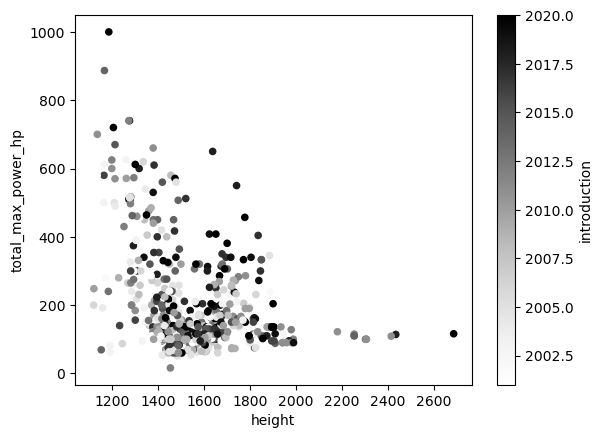

In [71]:
df.plot.scatter(x='height',y='total_max_power_hp', c='introduction');

We will see in the next class what all the commands below mean, but I'm writing it here to show to you what a typical flow would look like to do an exploratory plot of your data: you concatenate a long sequence of commands until at then you reach a `plot` statement. Note the `\` symbol at the end of each line which means - continue the statement on the next line as if it were on this line. This is to aid legibility but you could perfectly write it on one line if you wanted to:

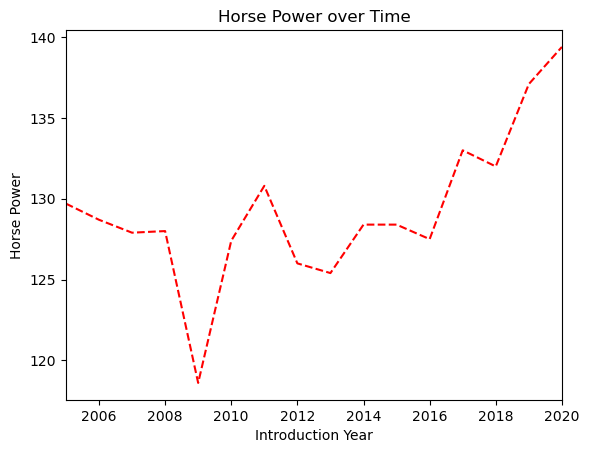

In [58]:
df.groupby('introduction')['total_max_power_hp']\
    .median()\
    .rolling(5)\
    .mean()\
    .plot(
        title='Horse Power over Time', 
        ylabel='Horse Power',
        xlabel='Introduction Year',
        style='r--',
        xlim=[2005,2020]
    );

I recommend that at home you diagonally go through the [official documentation](https://pandas.pydata.org/docs/user_guide/visualization.html) to see all the supported plots, but you can always ask ChatGPT for help if you have something specific in mind.

### Extra Arguments for Loading Datasets

Although defaults work in most cases satisfactorily, it is worth to comment a few things about some optional arguments of `pd.read_csv()` command. The list is not complete, but enough to give you an idea of the extent to which you can customize this function.

* `sep` specifies the column separator. The default is `sep=','`, but CSV files created with Excel may need `sep=';'`.
* `header` and `names` specify the row where the data to be imported start and the column names. The default is `header=0`, `names=None`, which makes Pandas start reading from the first row and take it as the column names. When the data come without names, you can use `header=None`, `names=namelist` to provide a list of names. With a positive value for header, you can skip some rows.
* `index_col` specifies a column that you wish to use as the index, if that is the case. The default is `index_col=None`. If the intended index comes in the first column, as frequently happens, you use `index_col=0`.
* `usecols` specifies the columns to be read. You can specify them in a list, either by name or by position. The default is `usecols=None`, which means that you wish to read all the columns.
* `dtype` specifies the data types of the columns of the data frame. This saves time with big data sets. The default is `dtype=None`, which means that Python will guess the data type, based on what it reads. When all the entries in a column are numbers, that column is imported as numeric. If there is, at least, one entry that is not numeric, all read as strings, and data type `object` is assigned to that column.
* `encoding`. If the string data contained in a CSV file can contain special characters (such as ñ, or á), which can make trouble, you may need to control this. The default in Python is `encoding='utf-8'`. So, if you reading a CSV file created in Excel (in Western Europe), you may need to set `encoding='latin'` to read the special characters in the right way.